# Credit Card Analysis

In [188]:
import numpy as np
import pandas as pd


import datetime as dt

In [189]:
Customer_Acquistion=pd.read_csv(r'Customer Acqusition.csv')
Customer_Acquistion

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [190]:
Spend=pd.read_csv(r'spend.csv')
Spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [191]:
Repayment=pd.read_csv(r'Repayment.csv')
Repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [192]:
Repayment=Repayment.drop(columns=['SL No:','Unnamed: 4'])

In [193]:
Repayment=Repayment.dropna()

In [194]:
Repayment

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1495,A67,9-May-05,55638.77
1496,A68,10-May-06,319836.49
1497,A69,11-Jul-06,247628.45
1498,A70,12-Aug-05,454016.51


## 1. In the above dataset

### a. In case age is less than 18, replace it with mean of age values.

In [195]:
Customer_Acquistion.Age.mean()

46.49

In [196]:
Customer_Acquistion.loc[(Customer_Acquistion.Age<18),'Age']=Customer_Acquistion.Age.mean()

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [197]:
Customer_Spend=pd.merge(left=Customer_Acquistion,right=Spend,on='Customer')
Customer_Spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [198]:
Customer_Spend["Amount"]=np.where(Customer_Spend.Amount > Customer_Spend.Limit,Customer_Spend.Limit*0.50,Customer_Spend.Amount)
Customer_Spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.


In [199]:
Customer_Repayment=pd.merge(left=Customer_Acquistion,right=Repayment,on='Customer')
Customer_Repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,25682.73


In [200]:
Customer_Repayment["Amount"]=np.where(Customer_Repayment.Amount > Customer_Repayment.Limit,Customer_Repayment.Limit,Customer_Repayment.Amount)

In [201]:
Customer_Repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,100000.00
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,10000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,10001.00
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,10002.00


## 2. From the above dataset create the following summaries:


### a. How many distinct customers exist?


In [202]:
Customer_Acquistion.Customer.drop_duplicates().count()

100

### b. How many distinct categories exist?

In [203]:
Customer_Acquistion.Product.drop_duplicates().count()

3

### c. What is the average monthly spend by customers?

In [204]:
Customer_Spend.Month=pd.to_datetime(Customer_Spend.Month,format='%d-%b-%y')

In [205]:
Customer_Spend.groupby(['Customer','Month'])[['Amount']].mean()

Amount
Customer Month                 
A1       2004-01-03  410556.130
         2004-01-12  463017.010
         2004-01-15   23740.460
         2004-01-25  439656.715
         2004-02-05   52208.650
...                         ...
A95      2004-01-15  240401.500
A96      2004-01-25   54729.660
A97      2004-01-12    5000.000
A98      2004-01-03    5000.500
A99      2004-01-15    5001.000

[1257 rows x 1 columns]

In [206]:
Customer_Spend['Month_No.']=Customer_Spend.Month.apply(lambda x:x.month)

In [207]:
Customer_Spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Month_No.
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,1
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,1
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,1
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,1


In [208]:
Customer_Spend.groupby(['Customer','Month_No.'])[['Amount']].mean()

Amount
Customer Month_No.               
A1       1          372762.587143
         2          175235.690000
         4          261649.250000
         5          361141.310000
         8          344372.100000
...                           ...
A95      1          240401.500000
A96      1           54729.660000
A97      1            5000.000000
A98      1            5000.500000
A99      1            5001.000000

[578 rows x 1 columns]

### d. What is the average monthly repayment by customers?


In [209]:
Customer_Repayment.Month=pd.to_datetime(Customer_Repayment.Month,format='%d-%b-%y')

In [210]:
Customer_Spend.groupby(['Customer','Month'])[['Amount']].mean()

Amount
Customer Month                 
A1       2004-01-03  410556.130
         2004-01-12  463017.010
         2004-01-15   23740.460
         2004-01-25  439656.715
         2004-02-05   52208.650
...                         ...
A95      2004-01-15  240401.500
A96      2004-01-25   54729.660
A97      2004-01-12    5000.000
A98      2004-01-03    5000.500
A99      2004-01-15    5001.000

[1257 rows x 1 columns]

In [211]:
Customer_Repayment['Month_No.']=Customer_Repayment.Month.apply(lambda x:x.month)

In [212]:
Customer_Spend.groupby(['Customer','Month_No.'])[['Amount']].mean()

Amount
Customer Month_No.               
A1       1          372762.587143
         2          175235.690000
         4          261649.250000
         5          361141.310000
         8          344372.100000
...                           ...
A95      1          240401.500000
A96      1           54729.660000
A97      1            5000.000000
A98      1            5000.500000
A99      1            5001.000000

[578 rows x 1 columns]

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. 
 ### Interest is earned only on positive profits and not on negative amounts)

In [213]:
Spend_Repayment=pd.merge(left=Spend,right=Repayment,on='Customer')
Spend_Repayment

,Sl No:,Customer,Month_x,Type,Amount_x,Month_y,Amount_y
0,1,A1,12-Jan-04,JEWELLERY,485470.80,12-Jan-04,495414.75
1,1,A1,12-Jan-04,JEWELLERY,485470.80,3-Jan-04,245899.02
2,1,A1,12-Jan-04,JEWELLERY,485470.80,15-Jan-04,259490.06
3,1,A1,12-Jan-04,JEWELLERY,485470.80,25-Jan-04,437555.12
4,1,A1,12-Jan-04,JEWELLERY,485470.80,17-Jan-05,165972.88
...,...,...,...,...,...,...,...
37279,349,A7,19-Apr-06,JEWELLERY,165956.43,22-Nov-05,55108.71
37280,349,A7,19-Apr-06,JEWELLERY,165956.43,3-Dec-05,429700.12
37281,349,A7,19-Apr-06,JEWELLERY,165956.43,23-Feb-05,344628.72
37282,349,A7,19-Apr-06,JEWELLERY,165956.43,31-Mar-06,336264.37


In [214]:
Spend.Month=pd.to_datetime(Spend.Month,format='%d-%b-%y')
Repayment.Month=pd.to_datetime(Repayment.Month,format='%d-%b-%y')

In [215]:
Spend["Month_No."]=Spend.Month.apply(lambda x:x.month)
Repayment["Month_No."]=Repayment.Month.apply(lambda x:x.month)

In [216]:
Spend_Repayment=pd.merge(left=Spend,right=Repayment,left_on=['Customer','Month_No.'],right_on=['Customer','Month_No.'])

In [217]:
Spend_Repayment

,Sl No:,Customer,Month_x,Type,Amount_x,Month_No.,Month_y,Amount_y
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-12,495414.75
1,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-03,245899.02
2,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-15,259490.06
3,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-25,437555.12
4,1,A1,2004-01-12,JEWELLERY,485470.80,1,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...
5311,1374,A44,2006-12-03,JEWELLERY,313591.17,12,2005-12-03,79696.21
5312,1441,A53,2005-04-27,JEWELLERY,129641.87,4,2006-04-02,493590.96
5313,1441,A53,2005-04-27,JEWELLERY,129641.87,4,2006-04-01,269353.50
5314,1441,A53,2005-04-27,JEWELLERY,129641.87,4,2005-04-04,339645.86


In [218]:
Spend_Repayment["Profit"]=Spend_Repayment.Amount_y-Spend_Repayment.Amount_x

In [219]:
Spend_Repayment

,Sl No:,Customer,Month_x,Type,Amount_x,Month_No.,Month_y,Amount_y,Profit
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-12,495414.75,9943.95
1,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-03,245899.02,-239571.78
2,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-15,259490.06,-225980.74
3,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-25,437555.12,-47915.68
4,1,A1,2004-01-12,JEWELLERY,485470.80,1,2005-01-17,165972.88,-319497.92
...,...,...,...,...,...,...,...,...,...
5311,1374,A44,2006-12-03,JEWELLERY,313591.17,12,2005-12-03,79696.21,-233894.96
5312,1441,A53,2005-04-27,JEWELLERY,129641.87,4,2006-04-02,493590.96,363949.09
5313,1441,A53,2005-04-27,JEWELLERY,129641.87,4,2006-04-01,269353.50,139711.63
5314,1441,A53,2005-04-27,JEWELLERY,129641.87,4,2005-04-04,339645.86,210003.99


In [220]:
Spend_Repayment["Month_Profit"]=np.where(Spend_Repayment.Profit>0,(Spend_Repayment.Profit*0.029),np.NaN)

In [221]:
Spend_Repayment

,Sl No:,Customer,Month_x,Type,Amount_x,Month_No.,Month_y,Amount_y,Profit,Month_Profit
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-12,495414.75,9943.95,288.37455
1,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-03,245899.02,-239571.78,NaN
2,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-15,259490.06,-225980.74,NaN
3,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-25,437555.12,-47915.68,NaN
4,1,A1,2004-01-12,JEWELLERY,485470.80,1,2005-01-17,165972.88,-319497.92,NaN
...,...,...,...,...,...,...,...,...,...,...
5311,1374,A44,2006-12-03,JEWELLERY,313591.17,12,2005-12-03,79696.21,-233894.96,NaN
5312,1441,A53,2005-04-27,JEWELLERY,129641.87,4,2006-04-02,493590.96,363949.09,10554.52361
5313,1441,A53,2005-04-27,JEWELLERY,129641.87,4,2006-04-01,269353.50,139711.63,4051.63727
5314,1441,A53,2005-04-27,JEWELLERY,129641.87,4,2005-04-04,339645.86,210003.99,6090.11571


### f. What are the top 5 product types?

In [222]:
Customer_Spend.groupby('Type')[['Amount']].sum().sort_values(by='Amount',ascending=False).head(5)

,Amount
Type,
PETRO,28597384.98
CAMERA,27690738.44
FOOD,20519243.60
AIR TICKET,20155847.12
TRAIN TICKET,19995825.72


### g. Which city is having maximum spend?


In [223]:
Customer_Spend.groupby('City')[['Amount']].sum().sort_values(by='Amount',ascending=False).head(1)

,Amount
City,
COCHIN,45963513.5


### h. Which age group is spending more money?


In [226]:
Customer_Spend["Age_Group"]=np.where(((Customer_Spend.Age.astype(int)>=18)&(Customer_Spend.Age.astype(int)<=30)),'Youth',
                    np.where(((Customer_Spend.Age.astype(int)>30)&(Customer_Spend.Age.astype(int)<=50)),'Middle Age','Senior'))

In [227]:
Customer_Spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Month_No.,Age_Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,Senior
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,1,Senior
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,1,Senior
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,1,Senior
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,1,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,1,Senior
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,1,Senior
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,1,Senior
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,1,Middle Age


In [228]:
Customer_Spend.groupby('Age_Group')[['Amount']].sum().sort_values(by='Amount',ascending=False)

,Amount
Age_Group,
Middle Age,94377675.45
Senior,72713511.57
Youth,52689898.21


### i. Who are the top 10 customers in terms of repayment?

In [229]:
Customer_Repayment.groupby('Customer')[['Amount']].sum().sort_values(by='Amount',ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [230]:
Customer_Spend['Year_No.']=Customer_Spend.Month.apply(lambda x:x.year)

In [231]:
Customer_Spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Month_No.,Age_Group,Year_No.
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,Senior,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,1,Senior,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,1,Senior,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,1,Senior,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,1,Senior,2005


In [232]:
CityProduct_Yearlyspend=pd.pivot_table(data=Customer_Spend,index='City',
                                    columns=['Product','Year_No.'],values='Amount',aggfunc=sum)
CityProduct_Yearlyspend

Product           Gold                              Platimum              \
Year_No.          2004         2005         2006        2004        2005   
City                                                                       
BANGALORE   9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY      6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA    7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI     1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN      7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI       2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA       2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM  2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                     Silver                         
Year_No.          2006        2004       2005        2006  
City                                                       
BANGALORE    685831.27  1291852.58  830612.34  1415480.94  
BOMBAY       972130.01   532089.03  508988.54  1092833.80  
CALCUTTA    3589606.66   500006.00  440147.06  1157956.42  
CHENNAI     5024923.40   282056.86  377184.49   350009.50  
COCHIN      4920592.29   814229.62  652269.38  1269990.87  
DELHI        176788.72   768172.30  612311.21   854899.97  
PATNA       1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM  2147403.75   209667.48  269912.99   555862.12

<AxesSubplot:xlabel='City'>

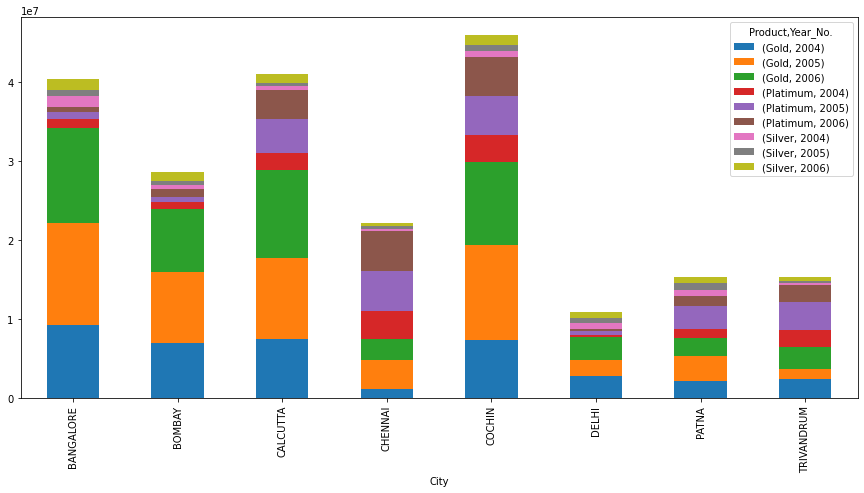

In [233]:
CityProduct_Yearlyspend.plot(kind='bar',figsize=(15,7),stacked=True)

## 4. Create graphs for
### a. Monthly comparison of total spends, city wise

In [234]:
CityProduct_Monthlyspend=pd.pivot_table(data=Customer_Spend,index='City',columns=['Month_No.'],values='Amount',aggfunc=sum)
CityProduct_Monthlyspend

Month_No.,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,9041796.84,6734494.76,5362903.07,4207980.48,6383115.13,1330685.90,2228217.69,695061.95,703018.28,1091602.61,2260603.07,422167.24
BOMBAY,5948993.33,4276988.30,5227850.50,1873785.01,3891945.60,1172594.97,177726.32,1066744.75,1278402.79,676005.70,2872049.40,140040.71
CALCUTTA,9064864.90,8150545.61,4939040.04,3457507.95,5578246.87,2293045.81,2234573.27,1548354.02,1511713.57,196357.83,2078880.93,55001.50
CHENNAI,4466961.36,4385815.95,3183643.71,2518656.99,2856199.62,1244242.16,693825.77,305875.97,745759.40,156247.17,1347779.28,223628.27
COCHIN,11714373.54,5747886.38,5645146.53,3882744.94,6581085.69,2495745.07,1290897.30,2317306.61,1382242.90,868551.89,3127999.60,909533.05
DELHI,2714261.45,1494064.06,2267149.02,777240.75,1600322.07,511276.09,50001.50,155402.16,50001.00,64615.46,391610.96,842342.02
PATNA,4916205.55,2353333.55,1437166.61,2338179.53,2136586.80,746186.13,50000.00,419383.64,70329.95,329537.34,413677.87,50000.00
TRIVANDRUM,3704336.99,2857123.89,2392316.51,1199293.45,2813534.48,400336.83,260484.50,453773.94,186063.70,285581.92,143387.40,640922.26


<AxesSubplot:xlabel='City'>

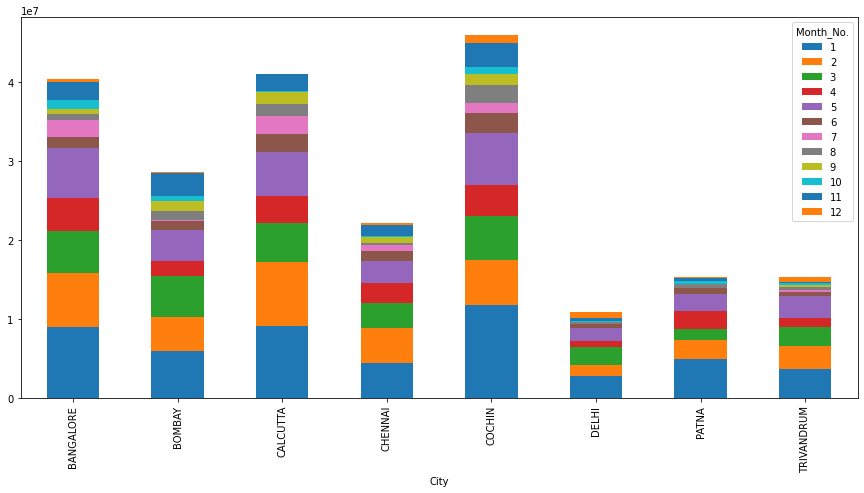

In [235]:
CityProduct_Monthlyspend.plot(kind='bar',figsize=(15,7),stacked=True)

### b. Comparison of yearly spend on air tickets

In [236]:
Airticket_Yearlyspend=pd.pivot_table(data=Customer_Spend[Customer_Spend.Type=='AIR TICKET'],
                                     index='Type',columns='Year_No.',values='Amount',aggfunc=sum)
Airticket_Yearlyspend

Year_No.,2004,2005,2006
Type,,,
AIR TICKET,4357225.35,10550152.21,5248469.56


<AxesSubplot:xlabel='Type'>

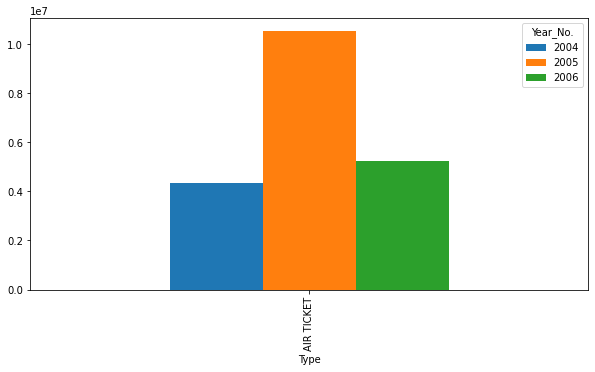

In [237]:
Airticket_Yearlyspend.plot(kind='bar',figsize=(10,5))

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [238]:
Product_Monthlyspend=pd.pivot_table(data=Customer_Spend,index='Product',columns='Month_No.',values='Amount',aggfunc=sum)

In [239]:
Product_Monthlyspend

Month_No.,1,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,,
Gold,32413831.83,24779179.55,19256972.48,13170572.59,21548169.76,6538862.64,5167416.37,4954030.42,3816887.62,3018223.38,9203267.46,2332940.96
Platimum,14951578.51,9134054.58,7288837.68,5182493.86,8151926.49,2965712.71,1288156.26,1714762.80,1667840.84,550275.04,2741618.42,750156.19
Silver,4206383.62,2087018.37,3909405.83,1902322.65,2140940.01,689537.61,530153.72,293109.82,442803.13,100001.50,691102.63,200537.90


<AxesSubplot:xlabel='Product'>

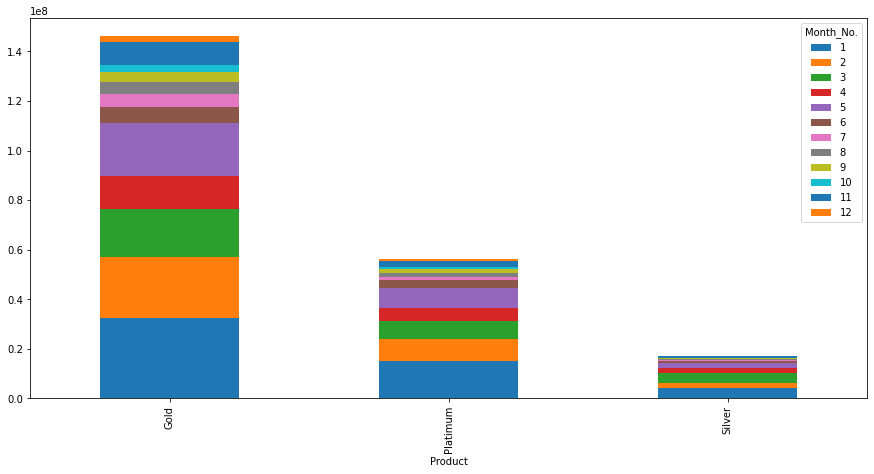

In [240]:
Product_Monthlyspend.plot(kind='bar',figsize=(15,7),stacked=True)

## 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by 
### different products and by different time periods i.e. year or month. The user should be able 
### to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
### function should automatically take these inputs while identifying the top 10 customers.

In [241]:
Customer_Repayment['Year_No.']=Customer_Repayment.Month.apply(lambda x:x.year)

In [242]:
Customer_Repayment.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Month_No.,Year_No.
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,1,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,1,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,1,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,1,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,1,2005


In [243]:
Customer_Repayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   No         1500 non-null   int64         
 1   Customer   1500 non-null   object        
 2   Age        1500 non-null   float64       
 3   City       1500 non-null   object        
 4   Product    1500 non-null   object        
 5   Limit      1500 non-null   float64       
 6   Company    1500 non-null   object        
 7   Segment    1500 non-null   object        
 8   Month      1500 non-null   datetime64[ns]
 9   Amount     1500 non-null   float64       
 10  Month_No.  1500 non-null   int64         
 11  Year_No.   1500 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 152.3+ KB


In [244]:
Top10=Customer_Repayment.groupby(['Customer','Product','City','Month_No.'])[['Amount']].sum().sort_values(by='Amount').head(10)

In [245]:
def Top10(Product_Name,Time):
    return Customer_Repayment.loc[(Customer_Repayment.Product==Product_Name)].groupby(['Customer','Product','City',Time])[['Amount']].sum().sort_values(by='Amount',ascending=False).head(10)

In [246]:
Product_Name=input('Enter product :')
Time=input('Enter Time :')

Enter product :Silver
Enter Time :Year_No.


In [248]:
Top10(Product_Name,Time)

Amount
Customer Product City       Year_No.            
A24      Silver  DELHI      2005      1184870.98
A22      Silver  BOMBAY     2005      1141542.81
A46      Silver  PATNA      2005      1116730.89
A25      Silver  COCHIN     2006      1000030.00
A23      Silver  BANGALORE  2005      1000010.00
A57      Silver  TRIVANDRUM 2004      1000010.00
A22      Silver  BOMBAY     2004       953419.47
                            2006       945271.83
A23      Silver  BANGALORE  2006       872925.32
A46      Silver  PATNA      2006       839228.07